In [1]:
from simulation import constellation
import matplotlib.pyplot as plt
import numpy as np

EARTH_RADIUS = 6371000
# Orbit Altitude (Km)
ALTITUDE = 550
semiMajorAxis = float(ALTITUDE) * 1000 + EARTH_RADIUS
STD_GRAVITATIONAL_PARAMETER_EARTH = 3.986004418e14

period = constellation.calculate_orbit_period(semi_major_axis=semiMajorAxis)
number_of_planes = 1
nodes_per_plane = 3

In [2]:
satellites, ellipse = constellation.initialize_position(
    number_of_planes, nodes_per_plane, period
)

In [3]:
center = ellipse.xyzCenter()

In [4]:
p0 = ellipse.xyzPos(0)
normal0 = p0 - center
d0 = -(normal0 @ center)

In [5]:
p1 = ellipse.xyzPos(ellipse.per / 4)
normal1 = p1 - center
d1 = -(normal1 @ center)

In [6]:
def calc_orbit_normal_vector(x, y, z):
    xy = y - x
    xz = z - x
    normal_vector = np.cross(xy, xz)
    normal_vector = normal_vector / np.linalg.norm(normal_vector)
    return normal_vector

In [7]:
normal = calc_orbit_normal_vector(ellipse.xyzPos(0), ellipse.xyzPos(ellipse.per / 4), ellipse.xyzPos(ellipse.per / 2))
d = -(normal @ center)

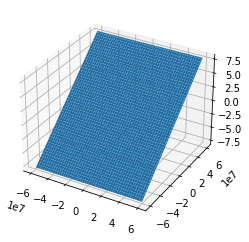

In [15]:
fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))

p2 = ellipse.xyzPos(ellipse.per / 2)
p3 = ellipse.xyzPos(3 * ellipse.per / 4)

xx, yy = np.meshgrid(np.linspace(-6 * 10e6, 6 * 10e6, 100), np.linspace(-6 * 10e6, 6 * 10e6, 100))

# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]
z0 = (-normal0[0] * xx - normal0[1] * yy - d0) * 1. /normal0[2]
z1 = (-normal1[0] * xx - normal1[1] * yy - d1) * 1. /normal1[2]

ax.plot_surface(xx, yy, z)
# ax.plot_surface(xx, yy, z0)
# ax.plot_surface(xx, yy, z1)

In [9]:
xs = xx.reshape(-1)
ys = yy.reshape(-1)
zs = z.reshape(-1)

In [10]:
z

array([[-79622689.29722458, -79622689.29722458, -79622689.29722458, ...,
        -79622689.29722458, -79622689.29722458, -79622689.29722458],
       [-78014150.11950287, -78014150.11950287, -78014150.11950287, ...,
        -78014150.11950287, -78014150.11950287, -78014150.11950287],
       [-76405610.94178116, -76405610.94178116, -76405610.94178116, ...,
        -76405610.94178116, -76405610.94178116, -76405610.94178116],
       ...,
       [ 76405610.94178116,  76405610.94178116,  76405610.94178116, ...,
         76405610.94178116,  76405610.94178116,  76405610.94178116],
       [ 78014150.11950289,  78014150.11950289,  78014150.11950289, ...,
         78014150.11950289,  78014150.11950289,  78014150.11950289],
       [ 79622689.29722458,  79622689.29722458,  79622689.29722458, ...,
         79622689.29722458,  79622689.29722458,  79622689.29722458]])

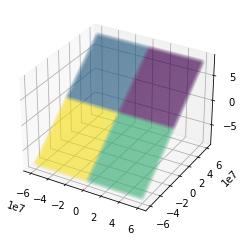

In [11]:
fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))

colors = []
for x, y, z in zip(xs, ys, zs):
    p = np.array((x, y, z))
    h0 = p @ normal0 - d0
    h1 = p @ normal1 - d1
    
    if h0 >= 0 and h1 >= 0:
        colors.append(1)
    elif h0 < 0 and h1 >= 0:
        colors.append(2)
    elif h0 >= 0 and h1 < 0:
        colors.append(3)
    else:
        colors.append(4)

ax.scatter(xs, ys, zs, c=colors, alpha=0.05)